In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'datasets/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    'datasets/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

# Save the model
model.save('dog_cat_classifier.h5')


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/20


/opt/homebrew/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 8570s 14s/step - accuracy: 0.7790 - loss: 0.4612 - val_accuracy: 0.8990 - val_loss: 0.2424
Epoch 2/20


2024-10-02 16:54:46.853582: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.10/3.10.15/Frameworks/Python.framework/Versions/3.10/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.1640
Epoch 3/20


2024-10-02 16:54:48.090861: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 6250s 10s/step - accuracy: 0.8608 - loss: 0.3083 - val_accuracy: 0.9044 - val_loss: 0.2310
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.3452
Epoch 5/20


2024-10-02 18:39:00.363996: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 3609s 6s/step - accuracy: 0.8726 - loss: 0.2916 - val_accuracy: 0.9058 - val_loss: 0.2225
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0985
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7651s 12s/step - accuracy: 0.8767 - loss: 0.2874 - val_accuracy: 0.9123 - val_loss: 0.2149
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3465
Epoch 9/20


2024-10-02 21:46:42.954512: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 6070s 10s/step - accuracy: 0.8788 - loss: 0.2744 - val_accuracy: 0.8874 - val_loss: 0.2669
Epoch 10/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1310
Epoch 11/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3599s 6s/step - accuracy: 0.8812 - loss: 0.2700 - val_accuracy: 0.9103 - val_loss: 0.2137
Epoch 12/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1316
Epoch 13/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3597s 6s/step - accuracy: 0.8828 - loss: 0.2671 - val_accuracy: 0.9125 - val_loss: 0.2075
Epoch 14/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0550
Epoch 15/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3583s 6s/step - accuracy: 0.8787 - loss: 0.2714 - val_accuracy: 0.9117 - val_loss: 0.2137
Epoch 16/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 

2024-10-03 02:27:37.189264: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 3579s 6s/step - accuracy: 0.8808 - loss: 0.2649 - val_accuracy: 0.9181 - val_loss: 0.2010
Epoch 18/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.1363
Epoch 19/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9684s 16s/step - accuracy: 0.8824 - loss: 0.2653 - val_accuracy: 0.9191 - val_loss: 0.2008
Epoch 20/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.2979


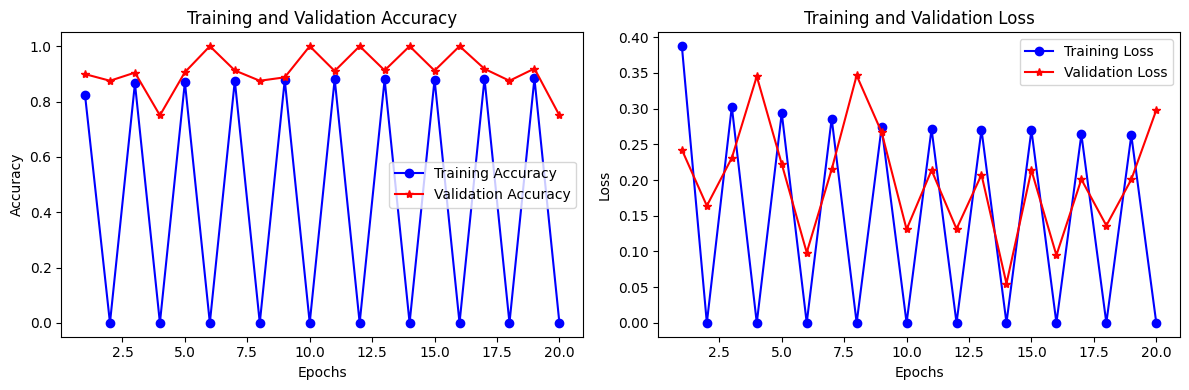

In [2]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from the history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
